In [1]:
# Remove warnings
import warnings

warnings.filterwarnings('ignore')

# Data manipulation 
import pandas as pd
# Dates handling
from datetime import datetime, timedelta
import pytz
from dateutil.relativedelta import relativedelta
# Chart modules
import matplotlib.pyplot as plt
import seaborn as sns

# Linear algrebra
import numpy as np


# Technical indicators
from ta.momentum import stochrsi
from ta.trend import ema_indicator

from modules.Utils.utils import loadFromDB, strategyTester
from modules.Utils.indicators import computeSuperTrend

In [2]:
SYMBOL='BTC'
df = loadFromDB(SYMBOL,'1h')
df['EMA20'] = ema_indicator(df.Close,28)
df['EMA50'] = ema_indicator(df.Close,54)
df['EMA7'] = ema_indicator(df.Close,7)
df['EMA70'] = ema_indicator(df.Close,70)
df['EMA100'] = ema_indicator(df.Close,100)
df['Stoch_RSI'] = stochrsi(df.Close, 14, smooth1=3, smooth2=3)
df.dropna(inplace=True)
df.tail()

,Open,High,Low,Close,Volume,Timestamp,EMA20,EMA50,EMA7,EMA70,EMA100,Stoch_RSI
Date,,,,,,,,,,,,
2022-10-16 13:00:00,19133.94,19145.48,19118.40,19127.57,3671.04980,1665925200,19146.651753,19177.836483,19135.093503,19189.662349,19209.756922,0.260367
2022-10-16 14:00:00,19127.57,19140.00,19104.16,19130.36,5559.74345,1665928800,19145.528184,19176.110066,19133.910127,19187.991860,19208.184705,0.330074
2022-10-16 15:00:00,19130.64,19172.55,19124.17,19158.49,5224.01837,1665932400,19146.422102,19175.469336,19140.055095,19187.160822,19207.200652,1.000000
2022-10-16 16:00:00,19158.49,19168.98,19125.53,19139.03,4554.59390,1665936000,19145.912302,19174.144269,19139.798821,19185.805024,19205.850738,0.449540
2022-10-16 17:00:00,19139.93,19157.73,19135.15,19145.58,1172.48825,1665939600,19145.889384,19173.105569,19141.244116,19184.671924,19204.657258,0.589871


In [3]:
df_day = loadFromDB(SYMBOL,'1d')
df_day = computeSuperTrend(df_day)
df_day.dropna(inplace=True)
df_day.tail()

,Open,High,Low,Close,Volume,Timestamp,ST_Direction
Date,,,,,,,
2022-10-12,19060.00,19238.31,18965.88,19155.53,213826.26731,1665532800,False
2022-10-13,19155.10,19513.79,18190.00,19375.13,399756.68337,1665619200,False
2022-10-14,19375.58,19951.87,19070.37,19176.93,351634.32601,1665705600,False
2022-10-15,19176.93,19227.68,18975.18,19069.39,113847.64232,1665792000,False
2022-10-16,19068.40,19195.00,19063.74,19146.91,74534.68490,1665878400,False


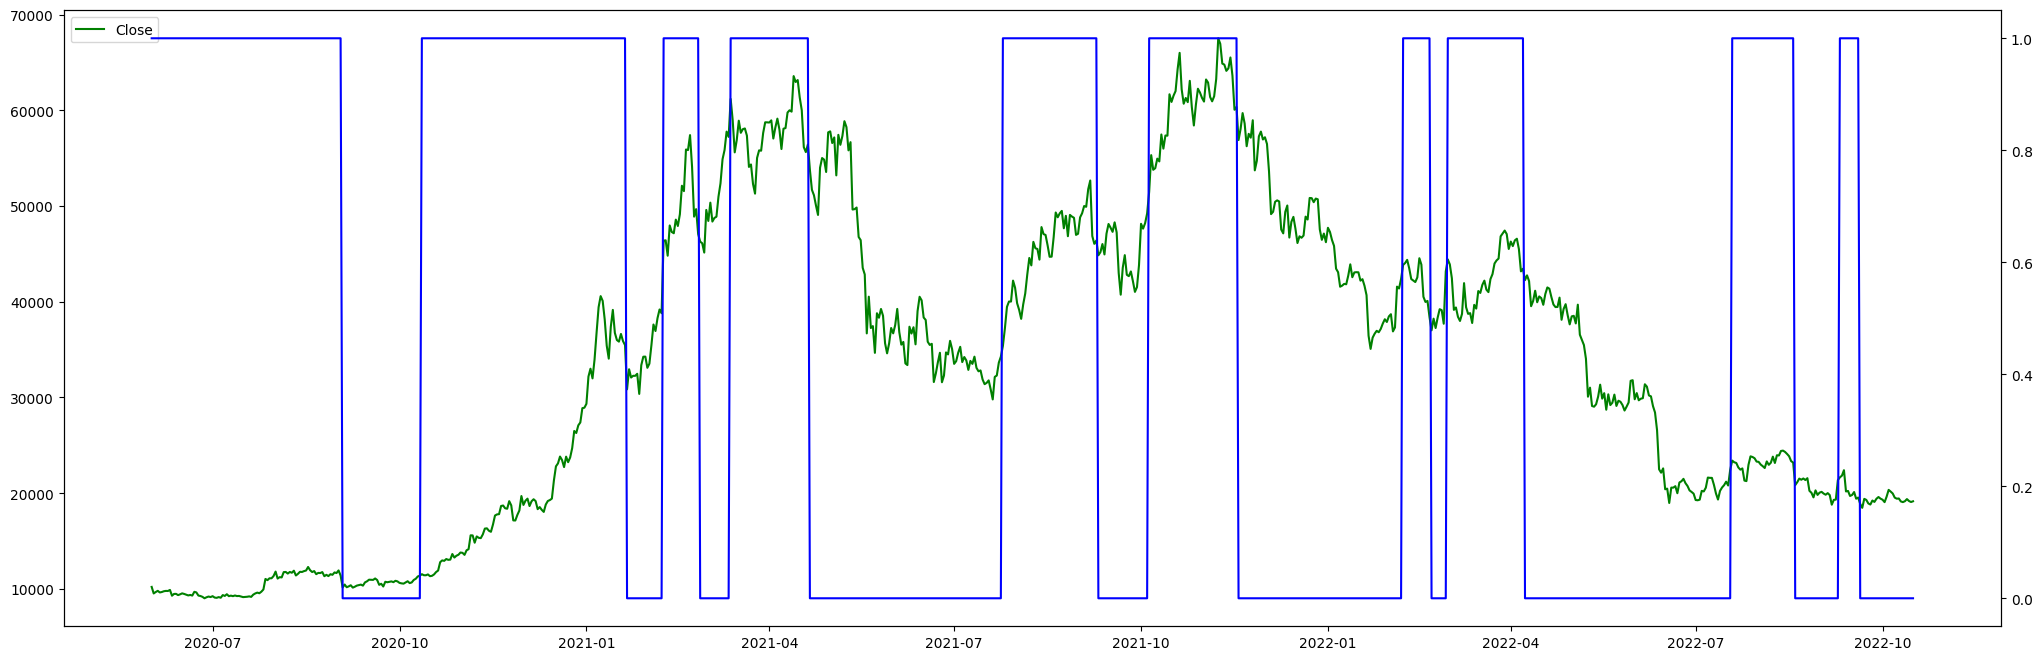

In [4]:
fig, ax = plt.subplots(1, figsize=(25,8))

ax.plot(df_day.Close, color='green',label='Close')
ax1 = ax.twinx()
ax1.plot(df_day.ST_Direction, color='blue',label='super_trend_direction')
ax.legend(loc="upper left")

In [5]:
df_day

,Open,High,Low,Close,Volume,Timestamp,ST_Direction
Date,,,,,,,
2020-06-01,9448.27,10380.00,9421.67,10200.77,76649.126960,1590969600,True
2020-06-02,10202.71,10228.99,9266.00,9518.04,108970.773151,1591056000,True
2020-06-03,9518.02,9690.00,9365.21,9666.24,46252.644939,1591142400,True
2020-06-04,9666.32,9881.63,9450.00,9789.06,57456.100969,1591228800,True
2020-06-05,9788.14,9854.75,9581.00,9621.16,47788.050050,1591315200,True
...,...,...,...,...,...,...,...
2022-10-12,19060.00,19238.31,18965.88,19155.53,213826.267310,1665532800,False
2022-10-13,19155.10,19513.79,18190.00,19375.13,399756.683370,1665619200,False
2022-10-14,19375.58,19951.87,19070.37,19176.93,351634.326010,1665705600,False


In [6]:
def addST(x):
    try:
        return df_day.loc[pd.to_datetime(x.name).date().strftime("%Y-%m-%d")].ST_Direction
    except:
        return np.nan
    
df['ST_day'] = df.apply(addST,axis=1)
df.head()

,Open,High,Low,Close,Volume,Timestamp,EMA20,EMA50,EMA7,EMA70,EMA100,Stoch_RSI,ST_day
Date,,,,,,,,,,,,,
2020-06-05 03:00:00,9798.05,9833.35,9750.00,9796.59,1481.819006,1591326000,9734.225274,9697.122698,9797.969598,9684.155392,9664.283519,0.000000,True
2020-06-05 04:00:00,9797.04,9826.33,9757.49,9783.70,1330.480529,1591329600,9737.637325,9700.270963,9794.402198,9686.959466,9666.648201,0.000000,True
2020-06-05 05:00:00,9784.53,9807.41,9774.50,9790.41,1378.198908,1591333200,9741.276819,9703.548746,9793.404149,9689.873565,9669.098930,0.078800,True
2020-06-05 06:00:00,9790.00,9806.29,9725.00,9799.21,1927.318634,1591336800,9745.272211,9707.027337,9794.855611,9692.953465,9671.675387,0.185542,True
2020-06-05 07:00:00,9799.20,9799.20,9750.10,9774.64,1365.820283,1591340400,9747.297576,9709.485980,9789.801709,9695.254494,9673.714290,0.000000,True


Period : [2020-06-05 03:00:00] -> [2022-10-16 17:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 3350.81 $
Performance vs US Dollar : 235.08 %
Buy and Hold Performence : 95.43 %
Performance vs Buy and Hold : 146.34 %
Best trade : +35.57 %, the 2021-02-22 14:00:00
Worst trade : -7.83 %, the 2022-02-18 01:00:00
Worst drawBack : -24.0 %
Total fees :  193.1 $

----- Trades Informations -----
Total trades on period : 55
Number of positive trades : 22
Number of negative trades :  33
Trades win rate ratio : 40.0 %
Average trades performance : 2.68 %
Average positive trades : 10.88 %
Median positive trades : 9.43 %
Average negative trades : -2.79 %
Median negative trades : -2.05 %

----- Plot -----


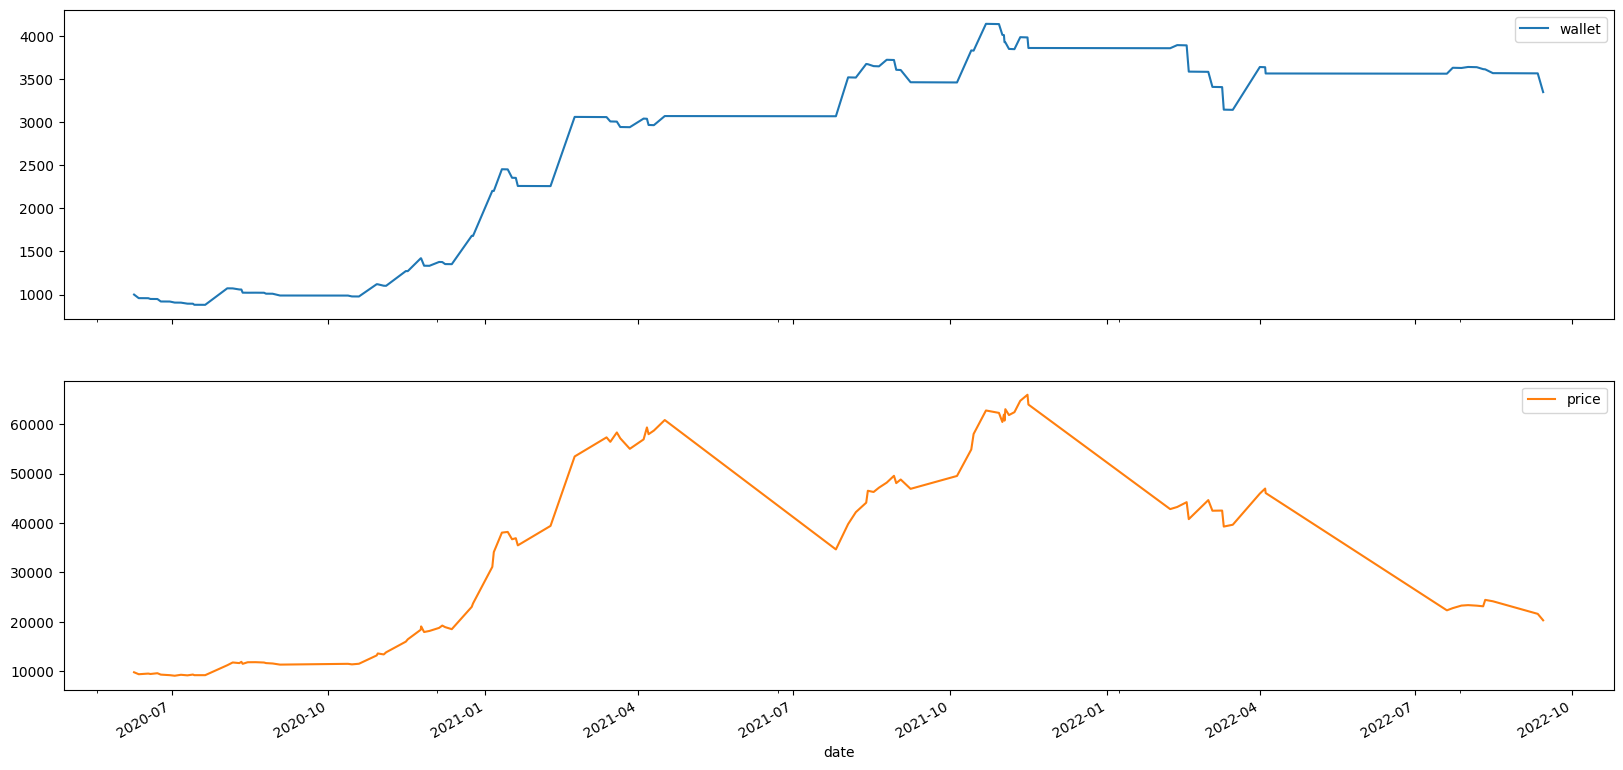

In [7]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if (row.EMA7>row.EMA20 and 
                    row.EMA20>row.EMA50 and   
                    row.Stoch_RSI>0.82 and
                    previous_row.Stoch_RSI<0.82 and
                    row.ST_day==True) else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if (row.EMA20<row.EMA50 and
                    row.Stoch_RSI>0.18 and
                    previous_row.Stoch_RSI<0.18)  else False


equity = strategyTester(df,buyCondition,sellCondition)